In [1]:
%load_ext autoreload
import ete3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [89]:
%autoreload
from src.xes.xes_file import XesFile
from src.xes.print_xes_info import PrintXesInfo
import src.utils
import src.xes.analyze_sequence
from src.xes.generators.graph_generator1 import GraphGenerator1
from src.xes.generators.graph_generator2 import GraphGenerator2

In [3]:
xes = XesFile.read("data/Activities of daily living of several individuals_1_all/data/edited_hh102_labour.xes/edited_hh102_labour.xes")
# PrintXesInfo.s_print_info(xes)

In [131]:
# GraphGenerator(n_min_events=20, n_max_events=30).fit(xes.traces[0].df).generate()
generator = GraphGenerator1(
    n_max_events=20,
    df_filter=lambda df: df[df["lifecycle:transition"] == "start"],
    sequence_keys=["concept:name"])
# generator = GraphGenerator1(n_max_events=20)
generator.fit(xes)

In [132]:
generator.generate()

['Start',
 'toilet',
 'relax',
 'personalhygiene',
 'relax',
 'personalhygiene',
 'outdoors',
 'snack',
 'read',
 'sleep',
 'medication',
 'sleep',
 'toilet',
 'dress',
 'personalhygiene',
 'sleep',
 'toilet',
 'snack',
 'relax',
 'toilet',
 'sleep']

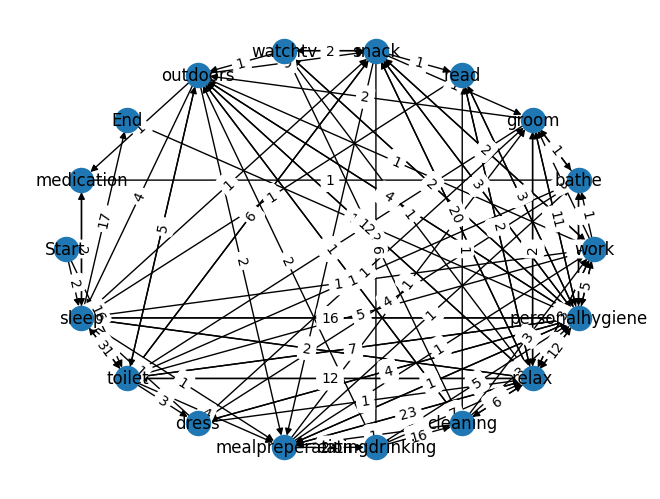

In [133]:
src.xes.analyze_sequence.draw_nx_graph(generator.sequence_, edge_label="frequency")

In [134]:
print(generator.tree_.get_ascii(attributes=["name", "step"]))

AttributeError: 'GraphGenerator1' object has no attribute 'tree_'

In [135]:
# GraphGenerator(n_min_events=20, n_max_events=30).fit(xes.traces[0].df).generate()
# generator = GraphGenerator1(
#     n_max_events=20,
#     df_filter=lambda df: df[df["lifecycle:transition"] == "start"],
#     sequence_keys=["concept:name"])
generator = GraphGenerator2(n_min_events=18, n_max_events=18)
generator.fit(xes)

In [140]:
generator.generate()

['Start, start',
 'Start, complete',
 'toilet, start',
 'toilet, complete',
 'sleep, start',
 'sleep, complete',
 'relax, start',
 'relax, complete',
 'outdoors, start',
 'outdoors, complete',
 'personalhygiene, start',
 'personalhygiene, complete',
 'relax, start',
 'relax, complete',
 'personalhygiene, start',
 'personalhygiene, complete',
 'End, start',
 'End, complete']

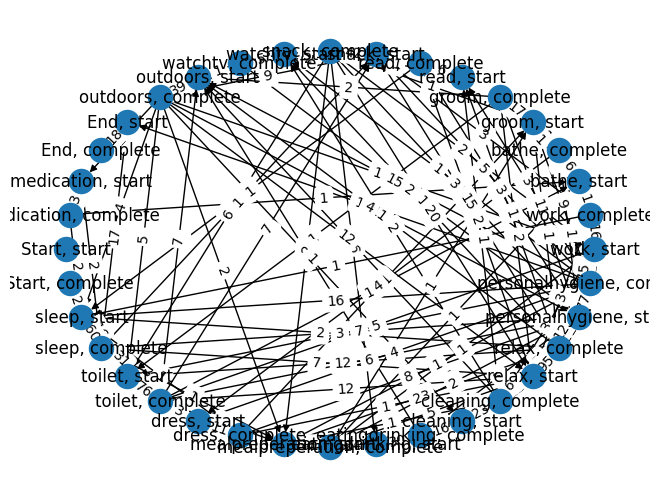

In [141]:
src.xes.analyze_sequence.draw_nx_graph(generator.sequence_, edge_label="frequency")

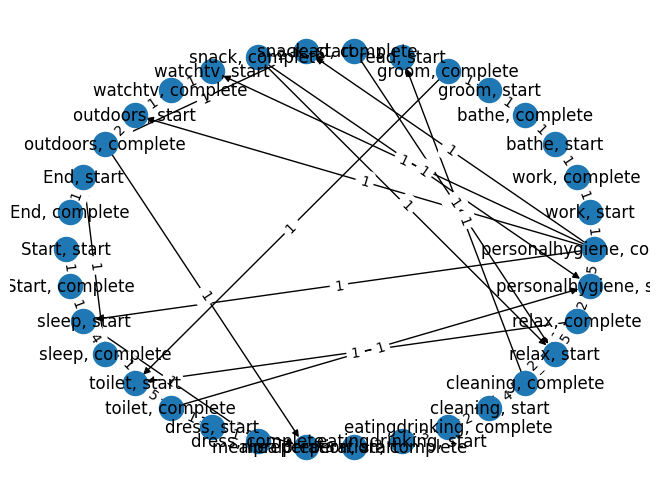

In [142]:
src.xes.analyze_sequence.draw_nx_graph(generator.sequences_[0], edge_label="frequency")

In [99]:
# print(generator.tree_.get_ascii(attributes=["name", "frequency"]))

In [143]:
def generated_to_df(l: list[str]):
    return pd.DataFrame(
        [s.split(", ") for s in l],
        columns=["concept:name", "lifecycle:transition"]
    )
generated = generated_to_df(generator.generate())
generated

,concept:name,lifecycle:transition
0,Start,start
1,Start,complete
2,toilet,start
3,toilet,complete
4,personalhygiene,start
5,personalhygiene,complete
6,sleep,start
7,sleep,complete
8,toilet,start
9,toilet,complete


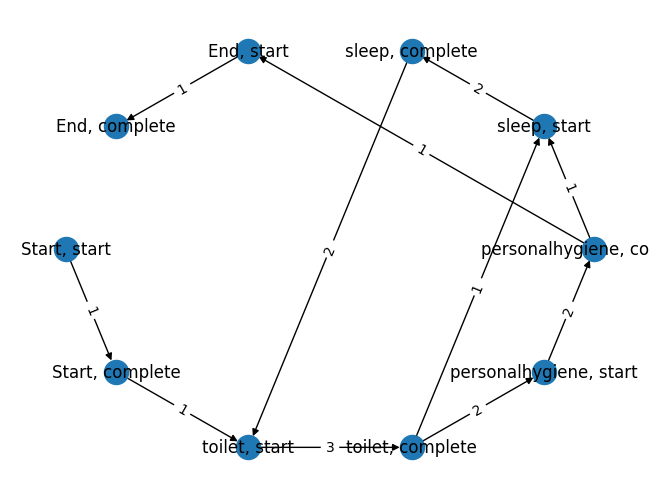

In [144]:
generated_sequence_graph = src.xes.analyze_sequence.analyze_sequence(generated)
src.xes.analyze_sequence.draw_nx_graph(generated_sequence_graph, edge_label="frequency")

In [146]:
import src.xes.metrics
nodes_dot_product = src.xes.metrics.dot_product(
    {node: 1 for node in generator.sequence_.nodes},
    {node: 1 for node in generated_sequence_graph.nodes}
)
edges_dot_product = src.xes.metrics.dot_product(
    {edge: data["frequency"] for edge, data in generator.sequence_.edges.items()},
    {edge: data["frequency"] for edge, data in generated_sequence_graph.edges.items()}
)
print(f"Nodes dot product: {nodes_dot_product}")
print(f"Edges dot product: {edges_dot_product}")

Nodes dot product: 0.5270462766947299
Edges dot product: 0.6121513491211874


In [145]:
src.xes.metrics.incorrect_transitions_ratio(
    {edge: data["frequency"] for edge, data in generator.sequence_.edges.items()},
    {edge: data["frequency"] for edge, data in generated_sequence_graph.edges.items()}
)

0.0